# Neural Networks

An [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network) (neural network or ANN for short) is a predictive model (for [regression](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) and [classification](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)) motivated by the way the brain operates.

## Import and Prepare the Data

[pandas](https://pandas.pydata.org/) provides excellent data reading and querying module,[dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which allows you to import structured data and perform SQL-like queries. We also use the [mglearn](https://github.com/amueller/mglearn) package to help us visualize the data and models.

Here we imported some house price records from [Trulia](https://www.trulia.com/?cid=sem|google|tbw_br_nat_x_x_nat!53f9be4f|Trulia-Exact_352364665_22475209465_aud-278383240986:kwd-1967776155_260498918114_). For more about extracting data from Trulia, please check [my previous tutorial](https://www.youtube.com/watch?v=qB418v3k2vk).

We use the house type as the [dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables) and the house ages and house prices as the [independent variables](https://en.wikipedia.org)

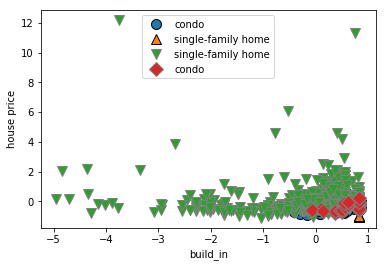

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn
from collections import Counter
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing


df = pandas.read_excel('house_price_label.xlsx')
# combine multipl columns into a 2D array
# also convert the integer data to float data
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 
X = preprocessing.scale(X) # scale the data before training the model
y = df.house_type
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3,stratify = y, random_state=0) 

# for classification, make sure a stratify splitting method is selected
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

## Multilayer Perceptrons (MLP) 

 [Multilayer Perceptrons](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) are one class of [feed-forward neural networks](https://en.wikipedia.org/wiki/Feedforward_neural_network) which are one type of ANNs. The network can be considered  a list (layers) of lists (neurons) of lists (weights):
* A [neuron](https://en.wikipedia.org/wiki/Artificial_neuron) simply is a list of weights whose length is one more than the number of inputs to that neuron (because of the bias weight).
* A layer is just a list of the neurons in that layer.
* A neural network as a list of (non-input) layers.

Here we use the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) to classify house types based on house ages and house prices. 


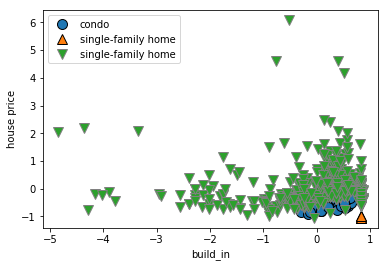

Training set accuracy: 0.83
Training Kappa: 0.468
Test set accuracy: 0.82
Test Kappa: 0.434


In [2]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10,), random_state=0).fit(X_train, y_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],mlp.predict(X_train))
plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

print("Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,mlp.predict(X_train))))
print("Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,mlp.predict(X_test))))

We can build a more complicated network by adding more hidden layers and/or more neurons in each hidden layer. 

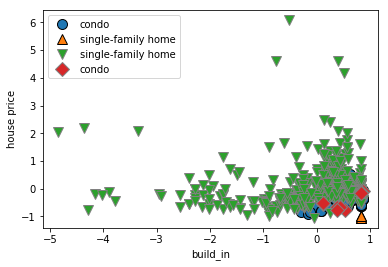

Training set accuracy: 0.88
Training Kappa: 0.672
Test set accuracy: 0.81
Test Kappa: 0.465


In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',  hidden_layer_sizes=(20,20,20), random_state=0).fit(X_train, y_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],mlp.predict(X_train))
plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

print("Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,mlp.predict(X_train))))
print("Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,mlp.predict(X_test))))

## Tunning the Parameters

Tuning neural network parameters is also an art unto itself. You can change the following [parameters](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) to increase/decrease the model complexity. 
* Number of hidden layers
* Number of neurons in each hidden layer
* Type of non-linear function
* Normalization, e.g., L2 penalty
* Learning rate
* Number of iterations
* And more …

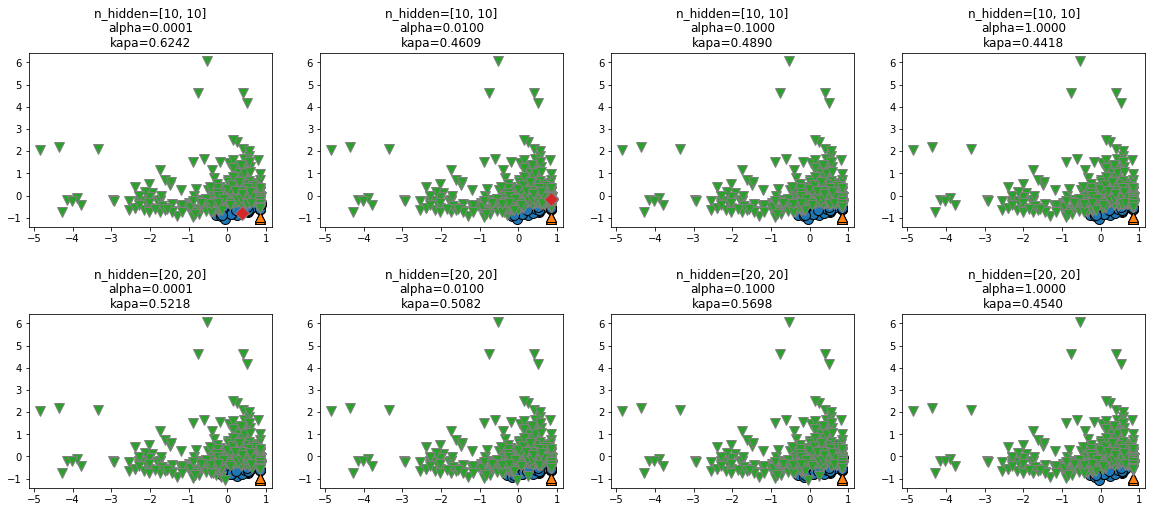

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 20]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)

        mlp.fit(X_train, y_train)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], mlp.predict(X_train), ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}\nkapa={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha,cohen_kappa_score(y_train,mlp.predict(X_train))))
        
plt.subplots_adjust(hspace=0.5)

## Inspect the Model

Most neural networks are black boxes — inspecting their details don’t give you much understanding of how they’re solving a problem. By visualizing the parameters that the model has learned, features that have tiny weights for all of the hidden units are “less important” to the model.

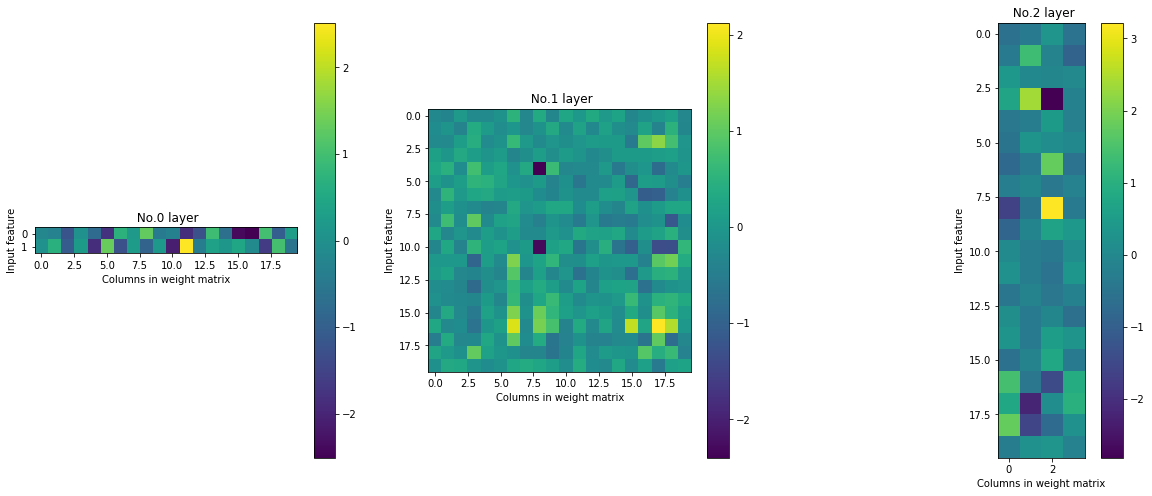

In [5]:
mlp = MLPClassifier(solver='lbfgs',  hidden_layer_sizes=(20,20), random_state=0).fit(X_train, y_train)
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
for i , ax in zip(range(3),axes):

    img = ax.imshow(mlp.coefs_[i], interpolation='none', cmap='viridis')

    ax.set_title(" No.{} layer".format(i))
    ax.set_xlabel("Columns in weight matrix")
    ax.set_ylabel("Input feature")
    fig.colorbar(img, ax = ax)


## Other Python Libraries

* [Keras](https://keras.io/)
* [Lasagna](https://lasagne.readthedocs.io/en/latest/)
* [Tensor-flow](https://www.tensorflow.org/)
* [PyBrain](http://pybrain.org/)
* [Pylearn2](https://github.com/lisa-lab/pylearn2)